In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0
# pip install --upgrade joblib==1.1.0 is needed now because of conflicts with joblib and bertopic

In [3]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

#### Pre-processing comments and posts

In [2]:
# Read in scraped data
comments_pd = pd.read_csv("data/wsb_comments.csv")
submissions_pd = pd.read_csv("data/wsb_posts.csv")

<IPython.core.display.Javascript object>

C:\Users\amits\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,6,17,18,19,20,21,22,23,24,26,29,31,32,37,38,39,49,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

C:\Users\amits\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Only keep comments and posts with more than 5 upvotes to avoid spam and unpopular content.

In [3]:
# only keep comments with more than 5 upvotes
commentslist = comments_pd[comments_pd['score'] > 1]['body'].tolist()
# only keep posts with more than 5 upvotes
submissionslist = submissions_pd[submissions_pd['score'] > 1]['selftext'].tolist()
# combine posts and comments
combined = submissionslist + commentslist

Removing sentences with less than 10 words since they are more likely to be memes with no real information

In [4]:
combined = [str(x) for x in combined]
combined = [x for x in combined if len(x) > 10]

#### BERTopic Transfer Learning

In [4]:
# we add this to remove stopwords, for lower volumes of data stopwords can cause issues
model = BERTopic(
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(combined)

Check top-5 words in top-30 topics

In [ ]:
freq = model.get_topic_info()
freq.head(30)

,Topic,Count,Name
0,-1,1394,-1_the_to_you_is
1,0,149,0_puts_bought_my_buying
2,1,124,1_spy_400_down_if
3,2,108,2_bulls_are_bull_to
4,3,102,3_inflation_edt0400_bloomberg_walter
5,4,96,4_imgemotet52th524260_imgemotet52th524271_imge...
6,5,96,5_money_trading_trade_you
7,6,79,6_390_we_380_spx
8,7,79,7_calls_bought_my_buying
9,8,70,8_eat_chicken_whiskey_diet


Topic '-1' above contains outliers as per the BERTopic. We see that top-5 words in this topic are simply stopwords, so most words should be bucketed in appropriate topics.

Lets check c-TF-IDF scores of words in third topic. Formula shown below from BERTopic documentation.

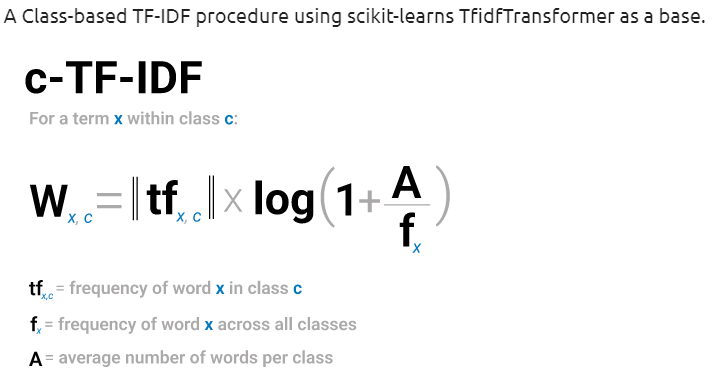

In [ ]:
a_topic = freq.iloc[3]['Topic']
model.get_topic(a_topic)

[('bulls', 0.12094768259045433),
 ('are', 0.023051255137253764),
 ('bull', 0.0176572140069673),
 ('to', 0.017624589200586432),
 ('sad', 0.013606034974238993),
 ('you', 0.013558880968444887),
 ('will', 0.013499560712920355),
 ('bullish', 0.013140532057087765),
 ('we', 0.012933881531338827),
 ('the', 0.012591639980659364)]

In [ ]:
# Interactive plot to visualize which topics are similar
# Pasted an image as plots are not interactive in GitHub
model.visualize_topics()

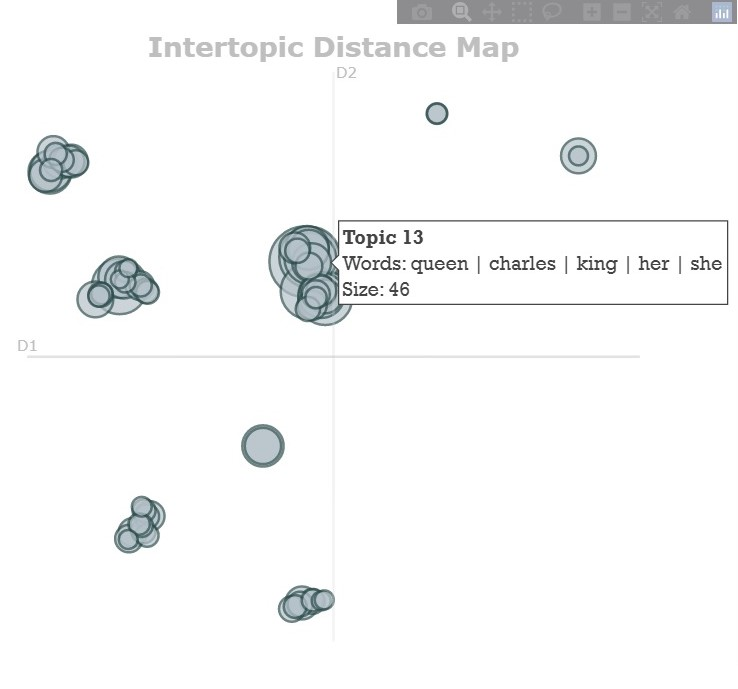

Topics are clustered nicely - we see in one cluster on the bottom left - everything related to derivatives trading and options trading in particular.

Middle cluster one talks about inflation and recession.

Top right cluster is Jerome Powell, Elon Musk and Zukerberg related.

Top left is lifestyle and food related. (Unusual for WallStreetBets subreddit. Might want to manually check these)

Cluster to the right mostly consists of slangs and off-topic words considering its a stock market subreddit.

In [ ]:
# Interactive plot of top-5 words in each topic
# Pasted an image as plots are not interactive in GitHub
model.visualize_barchart(top_n_topics=25)

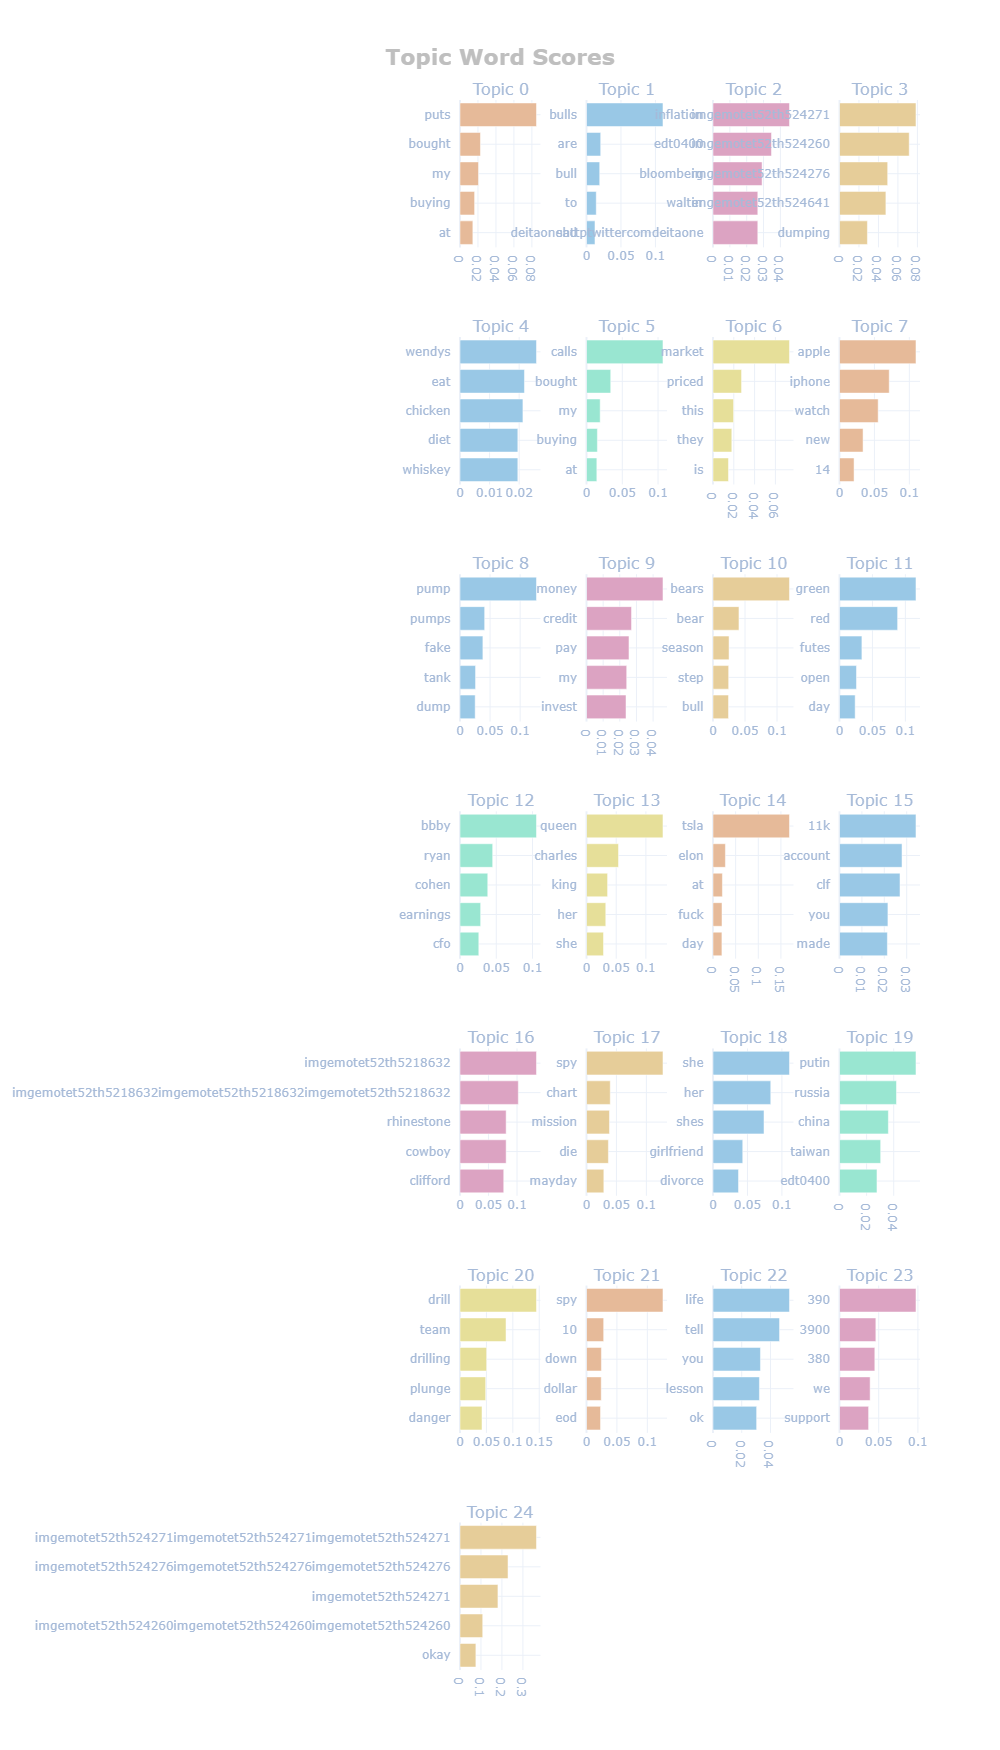

The most popular topic is people buying puts and that bulls are 'sad'.
We also see people discussing the queens death, the new iphone, watch and 14. queens dead and prince charles etc.

In [ ]:
# Check dendrogram for topic similarity
# Pasted an image as plots are not interactive in GitHub
model.visualize_hierarchy(top_n_topics=30)

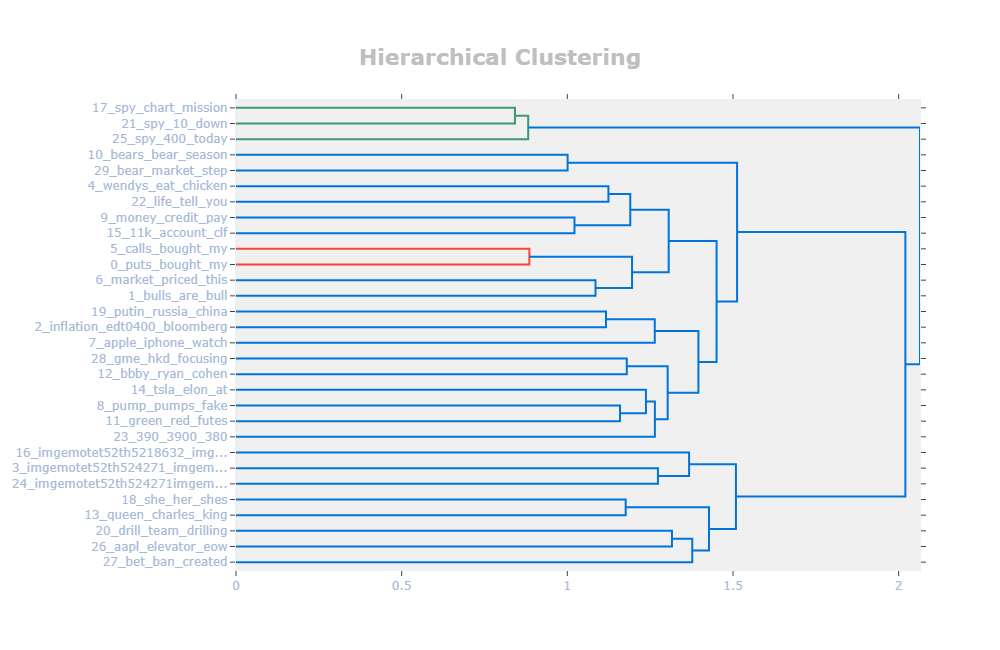

At a broad level, there are 3 cluster of topics. First cluster contains chatter about SPY index. Second cluster contains news related to stock market and third contains irrelevant/meme posts.